In [40]:
name = "Topi Ahola"
id = 2421479

In [41]:
# Select the data file based on your student ID
n = id % 5 # Take the modulo 5 of your student ID
num_list = [3, 4, 6, 8, 9] # List of numbers to select from
filename = f'./data/bidmc_{num_list[n]:02d}_Signals.csv'
print(f'Filename: {filename}')

Filename: ./data/bidmc_09_Signals.csv


In [42]:
# Run if needed
#!pip install numpy pandas matplotlib scipy

In [43]:
# Read necessary libraries and functions
import numpy as np                  # for numerical operations
import matplotlib.pyplot as plt     # for plotting
import pandas as pd                 # for reading data
from scipy.signal import find_peaks # for peak detection
import os                           # for file operations

In [44]:
# Print the list of files in the ./data directory
os.listdir('./data')

['bidmc_02_Fix.txt',
 'bidmc_02_Signals.csv',
 'bidmc_03_Fix.txt',
 'bidmc_03_Signals.csv',
 'bidmc_04_Fix.txt',
 'bidmc_04_Signals.csv',
 'bidmc_06_Fix.txt',
 'bidmc_06_Signals.csv',
 'bidmc_08_Fix.txt',
 'bidmc_08_Signals.csv',
 'bidmc_09_Fix.txt',
 'bidmc_09_Signals.csv']

In [45]:
# Read the data
data = pd.read_csv(filename)

# Get PPG signal and create time vector
ppg = data[' PLETH']
ts = 0.008 # Sample time in seconds
fs = 1/ts # Sample rate (Hz), samples per second
t = np.arange(len(ppg))*ts

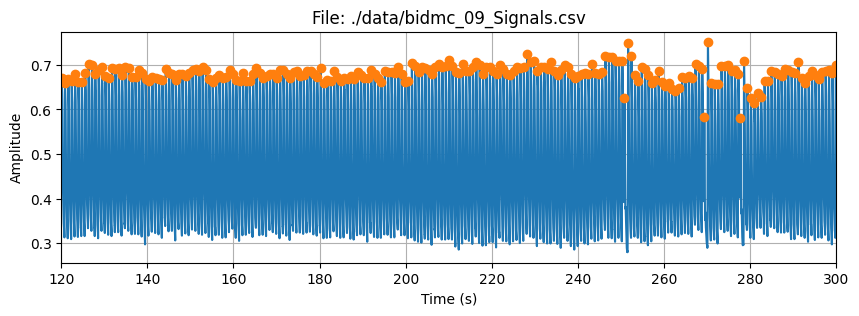

In [53]:
# Plot 180 seconds of the full signal
plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')
plt.xlim(120, 300)
#detect peaks and mark them:
peaks, properties = find_peaks(ppg, height=0.5, distance = 20)
plt.plot(t[peaks], ppg[peaks], 'o')

plt.grid()
plt.show()

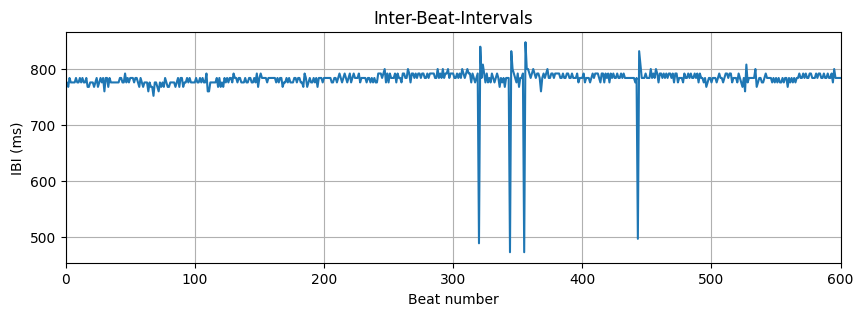

Mean IBI: 781.4ms
Mean heart rate: 76.8BPM
IBI standard deviation: 25.9ms
RMSSD: 39.3ms
lnRMSSD: 3.7ms


In [50]:
#calculates inter-beat intervals and plots them
ppi = np.diff(peaks)*ts*1000 #peak_to_peak_interval in milliseconds
plt.figure(figsize = (10, 3))
plt.plot(ppi)
plt.xlabel('Beat number')
plt.ylabel('IBI (ms)')
plt.title(f'Inter-Beat-Intervals')
plt.xlim(0, 600)
plt.grid()
plt.show()
#calculates mean IBI and mean heart rate and prints them
mean_IBI = np.mean(ppi)
print(f'Mean IBI: {mean_IBI:.1f}ms')
mean_heart_rate = (1/mean_IBI)*60000 #beats per minute
print(f'Mean heart rate: {mean_heart_rate:.1f}BPM')

#standard deviation of IBI:
std_IBI = np.std(ppi)
print(f'IBI standard deviation: {std_IBI:.1f}ms')

#Root mean square of successive differences (RMSSD):
rmsdiff = np.sqrt(np.mean(np.square(np.diff(ppi)))) #onko diff oikea?
print(f'RMSSD: {rmsdiff:.1f}ms')

#natural logarithm of RMSSD:
lnRMSSD = np.log(rmsdiff)
print(f'lnRMSSD: {lnRMSSD:.1f}ms')


Subject:
Age: 64
Gender: F

HRV values:
Mean IBI:               781.4ms <br>
RMSSD:                  39.3ms  <br>
lnRMSSD:                3.7ms   <br>
Mean heart rate:        76.8BPM <br>
IBI standard deviation: 25.9ms  <br>
                                <br>

"Normal" values for subject of same age range and gender: <br>
Mean IBI:               868 +-118ms <br>
RMSSD:                  21.4 +-11.9ms <br>
lnRMSSD:                3.06ms  <br>
Mean heart rate:        69BPM   <br>
IBI standard deviation: 30.6 +-12.4ms   <br>

Interpretations: <br>
Subject's mean inter-beat interval and standard deviation are within normal range and bellow average. RMSSD and lnRMSSD exceed normal values. Low heart rate with higher variability is normal for autonomic nervous system being in recovery mode with parasympathetic nervous system being active.
However, the higher variability can be affected also by irregular heartbeats shown in the ppg plot in 250-280 second range. (shown bellow) Interpreting whether this is normal is best left for a medical professional.





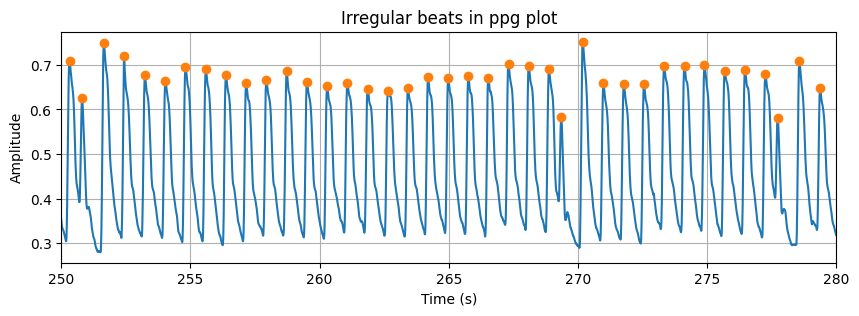

In [55]:
# Plot 180 seconds of the full signal
plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'Irregular beats in ppg plot')
plt.xlim(250, 280)
peaks, properties = find_peaks(ppg, height=0.5, distance = 20)
plt.plot(t[peaks], ppg[peaks], 'o')
plt.grid()
plt.show()